In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels import tsa
from statsmodels import graphics


sns.set(rc={'figure.figsize':(12, 8)})
np.random.seed(11148705)

First we generate the covariance matrix via the autocorrelation function

\begin{align}
    \rho_x(h) = \prod_{k=1}^{h} \frac{k-1+d}{k-d}
\end{align}

In [47]:
def autocorr(h, d):
    rho = 1
    for k in range(1, h+1):
        rho *= (k - 1 + d) / (k - d)
        
    return rho

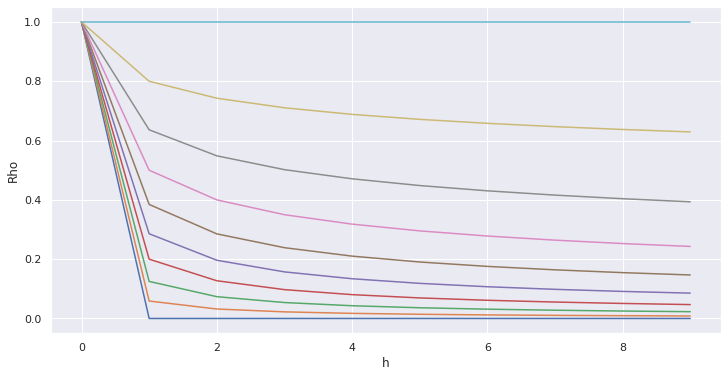

In [51]:
plt.figure(figsize=(12, 6))
for d in np.linspace(0, 0.5, 10):
    rhos = [autocorr(h, d) for h in range(10)]

    plt.plot(rhos)
    
plt.xlabel('h')
plt.ylabel('Rho')
plt.show()

In [62]:
def make_symm_off_diag(n, h):
    return np.diag(np.ones(n-h), h) + np.diag(np.ones(n-h), -h)

In [96]:
def gen_covariance_matrix(n, d):
    cov = np.identity(n)
    
    for h in range(1, n):
        rho = autocorr(h, d)
        cov += rho*make_symm_off_diag(n, h)
        
    return cov

In [97]:
def simulate_sample(n, d):
    print('Gen cov')
    sigma = gen_covariance_matrix(n, d)
    print('chol')
    L = np.linalg.cholesky(sigma)
    
    return L@np.random.normal(size=(n))

In [98]:
white_noise = simulate_sample(1_000, 0)
cointegrated = simulate_sample(1_000, 0.4)

Gen cov
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


KeyboardInterrupt: 